# Lending Case Study

**Business Objectives**
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


### Assignment
### UPGRAD - ML C39 EPGP & MSML Batch Mar22 

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

#set options
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None,'display.max_rows',500, 'display.max_colwidth', 1500, 'display.float_format',  '{:,.2f}'.format)


### Data Understanding and Analysis

In [2]:
# Load data 
loan_df = pd.read_csv('./data/loan.csv')
print("Loan Data Shape :",loan_df.shape)
loan_df.head(3)

Loan Data Shape : (39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [3]:
#data dictionary
loandict_df = pd.read_excel('./data/Data_Dictionary.xlsx')
loandict_df

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [4]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","14,035.00","2,786.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,661.00",0.00,"39,717.00",0.00,0.00,0.00,"39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,661.00","39,717.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"39,020.00","39,678.00",0.00,0.00,0.00,0.00
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,35.90,69.70,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,22.02,43.82,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.00,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,18.00,22.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00,NaN,1.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,34.00,90.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,

### Data Cleaning - Missing, Empty Columns, Outlier Treatments etc.

In [5]:
# Remove rows with loan status as Current. For our analysis we only consider loan status as fully paid or charged off
loan_df = loan_df[loan_df.loan_status != 'Current']
print("Loan Data Shape :",loan_df.shape)


Loan Data Shape : (38577, 111)


In [6]:
# Find count columns with null values
print("Percentage Null Values per Column\n", round((100*loan_df.isnull().sum().sort_values(ascending=False))/len(loan_df.index)))


Percentage Null Values per Column
 verification_status_joint        100.00
annual_inc_joint                 100.00
mo_sin_old_rev_tl_op             100.00
mo_sin_old_il_acct               100.00
bc_util                          100.00
bc_open_to_buy                   100.00
avg_cur_bal                      100.00
acc_open_past_24mths             100.00
inq_last_12m                     100.00
total_cu_tl                      100.00
inq_fi                           100.00
total_rev_hi_lim                 100.00
all_util                         100.00
max_bal_bc                       100.00
open_rv_24m                      100.00
open_rv_12m                      100.00
il_util                          100.00
total_bal_il                     100.00
mths_since_rcnt_il               100.00
open_il_24m                      100.00
open_il_12m                      100.00
open_il_6m                       100.00
open_acc_6m                      100.00
tot_cur_bal                      100.00
tot_c

#### Remove Columns where more than 90% data is missing.

In [7]:
print("Count of Columns with more than 90% Null Values: ", loan_df.columns[loan_df.isnull().sum()/len(loan_df) > .90].shape[0])

Count of Columns with more than 90% Null Values:  56


In [8]:
#drop columns 
loan_df.dropna(axis=1, thresh=(int(((100-90.0)/100)*loan_df.shape[0] + 1)),inplace=True)
print("Percentage Null Values per Column\n", round((100*loan_df.isnull().sum().sort_values(ascending=False))/len(loan_df.index)))
print("Loan Data Shape :",loan_df.shape)


Percentage Null Values per Column
 mths_since_last_delinq       65.00
desc                         32.00
emp_title                     6.00
emp_length                    3.00
pub_rec_bankruptcies          2.00
last_pymnt_d                  0.00
chargeoff_within_12_mths      0.00
collections_12_mths_ex_med    0.00
revol_util                    0.00
tax_liens                     0.00
title                         0.00
last_credit_pull_d            0.00
out_prncp                     0.00
initial_list_status           0.00
out_prncp_inv                 0.00
total_pymnt                   0.00
total_acc                     0.00
total_pymnt_inv               0.00
recoveries                    0.00
total_rec_prncp               0.00
total_rec_int                 0.00
total_rec_late_fee            0.00
pub_rec                       0.00
collection_recovery_fee       0.00
last_pymnt_amnt               0.00
policy_code                   0.00
application_type              0.00
acc_now_delinq      

In [9]:
# check for columns with unique values
print("Unique Values per column\n", loan_df.nunique().sort_values())


Unique Values per column
 tax_liens                         1
initial_list_status               1
out_prncp                         1
out_prncp_inv                     1
collections_12_mths_ex_med        1
policy_code                       1
pymnt_plan                        1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mt

#### Drop Columns with just single unique value

In [10]:
print(loan_df.loc[:,loan_df.nunique()==1].columns)
loan_df = loan_df.loc[:,loan_df.nunique()!=1]
print("Loan Data Shape :",loan_df.shape)


Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')
Loan Data Shape : (38577, 44)


In [11]:
#Understanding rest of the columns as per data dictionary 

loandict_df[loandict_df['LoanStatNew'].isin(loan_df.columns)]

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan application
4,annual_inc,The self-reported annual income provided by the borrower during registration.
11,collection_recovery_fee,post charge off collection fee
13,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
15,desc,Loan description provided by the borrower
16,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened
19,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
20,emp_title,The job title supplied by the Borrower when applying for the loan.*
23,funded_amnt,The total amount committed to that loan at that point in time.


#### Attributes which are Customer behavourial variablies and those won't contribute in default analysis
+ id
+ member_id
+ url 
+ title 
+ emp_title 
+ zip_code 
+ last_credit_pull_d
+ desc
+ total_pymnt_inv 
+ funded_amnt
+ delinq_2yrs
+ revol_bal
+ total_pymnt
+ total_rec_prncp
+ total_rec_int
+ total_rec_late_fee
+ recoveries
+ collection_recovery_fee
+ last_pymnt_d
+ last_pymnt_amnt
+ mths_since_last_delinq
+ earliest_cr_line
+ inq_last_6mths
+ open_acc
+ pub_rec
+ revol_util
+ total_acc

In [12]:
loan_df.drop(["id","member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "desc","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", 
"last_pymnt_d", "last_pymnt_amnt", "mths_since_last_delinq","earliest_cr_line", "inq_last_6mths","open_acc", "pub_rec", "revol_util", "total_acc"], axis = 1, inplace = True)


In [13]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,"4,975.00",36 months,10.65%,162.87,B,B2,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.00
1,2500,"2,500.00",60 months,15.27%,59.83,C,C4,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,GA,1.00,0.00
2,2400,"2,400.00",36 months,15.96%,84.33,C,C5,10+ years,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.00
3,10000,"10,000.00",36 months,13.49%,339.31,C,C1,10+ years,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.00
5,5000,"5,000.00",36 months,7.90%,156.46,A,A4,3 years,RENT,"36,000.00",Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.00


In [14]:
print("Loan Data Shape :",loan_df.shape)
loan_df.info()


Loan Data Shape : (38577, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt_inv       38577 non-null  float64
 2   term                  38577 non-null  object 
 3   int_rate              38577 non-null  object 
 4   installment           38577 non-null  float64
 5   grade                 38577 non-null  object 
 6   sub_grade             38577 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  addr_state            38577 non-null  ob

<H4>Correcting existing attributes, Data Type Conversion and Deriving new attributes from existing attributes.</H4>

In [15]:
# Check existing attributes data types
loan_df.dtypes

loan_amnt                 int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [16]:
loan_df['term_months'] = loan_df['term'].str.rstrip('months')
loan_df['term_months']=loan_df['term_months'].str.rstrip()
loan_df['term_months'] = loan_df['term_months'].astype(np.int)
del loan_df['term']

In [17]:
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%')
loan_df['int_rate']= loan_df['int_rate'].astype(np.float)

In [18]:
loan_df['income_in_lacs'] = loan_df['annual_inc'] / 1000

In [19]:
loan_df['emp_length'] = loan_df['emp_length'].str.rstrip('years ')
loan_df['emp_length'] = loan_df['emp_length'].str.rstrip('year ')
loan_df['emp_length'] = loan_df['emp_length'].str.rstrip()
loan_df['emp_length'].replace({'10+':10}, inplace=True)
loan_df['emp_length'][loan_df['emp_length']=='< 1']=0.5
loan_df['emp_length']
loan_df['emp_length']= loan_df['emp_length'].astype(np.float)
loan_df['emp_length']

0       10.00
1        0.50
2       10.00
3       10.00
5        3.00
         ... 
39712    4.00
39713    3.00
39714    0.50
39715    0.50
39716    0.50
Name: emp_length, Length: 38577, dtype: float64

In [20]:
loan_df['issue_d']=loan_df['issue_d'].str.strip()
loan_df['issue_month'],loan_df['issue_year'] = loan_df['issue_d'].str.split('-').str
loan_df['issue_year'] = '20' + loan_df['issue_year']
loan_df['issue_year'] = loan_df['issue_year'].astype(np.int)
del loan_df['issue_d']

### Univariate Analysis


In [21]:
sns.set(style='whitegrid',palette=sns.color_palette('Set2'))

Loan Amount

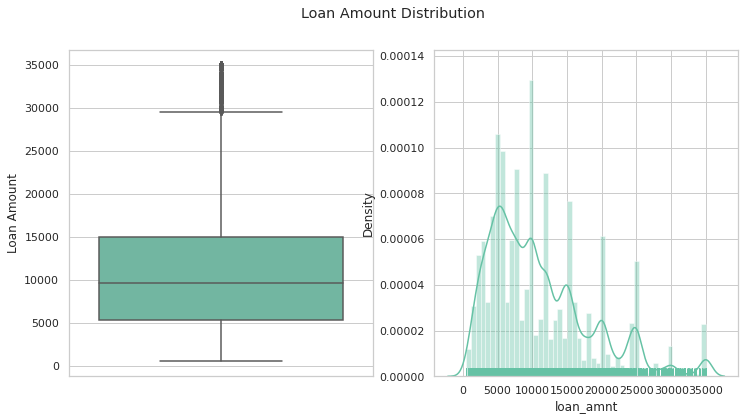

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot( y=loan_df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.subplot(1,2,2)
sns.distplot(a=loan_df.loan_amnt, rug=True)
plt.suptitle('Loan Amount Distribution')
plt.show()

In [23]:
loan_df.loan_amnt.quantile([0.25, 0.5,0.75,0.90,0.95,0.97,0.98,1.0])

0.25    5,300.00
0.50    9,600.00
0.75   15,000.00
0.90   21,600.00
0.95   25,000.00
0.97   28,000.00
0.98   30,000.00
1.00   35,000.00
Name: loan_amnt, dtype: float64

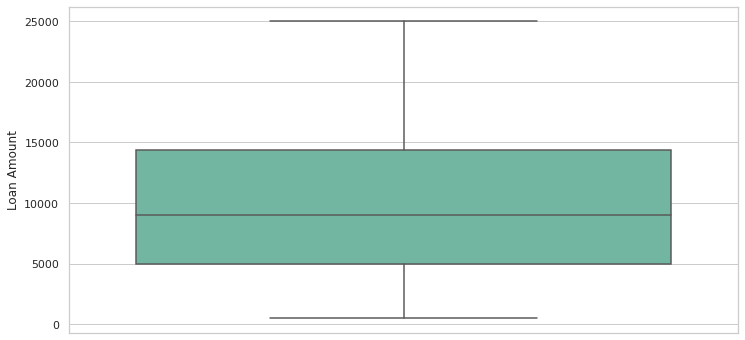

In [24]:
loan_amt_per95 = loan_df[loan_df.loan_amnt<=loan_df.loan_amnt.quantile(0.95)]
plt.figure(figsize=(12,6))

sns.boxplot( y=loan_amt_per95['loan_amnt'])
plt.ylabel('Loan Amount')
plt.show()

#### Observations
+ The loan amount varies from 0 to 35,000 also mean of distribution is 10000.
+ Very few borrowers took 30000 or more loan amount. 

Loan Status

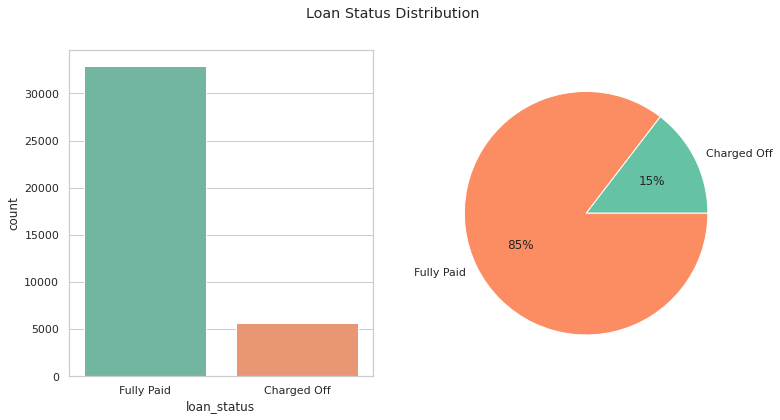

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(loan_df['loan_status'])
plt.subplot(1,2,2)
plt.pie(loan_df.groupby('loan_status')['loan_status'].count(),labels=['Charged Off','Fully Paid'],autopct='%.0f%%')
plt.suptitle('Loan Status Distribution')
plt.show()

#### Observations
+ 85% borrowers have paid full amount
+ ~15% nearly borrowers have defaulted the loan

Customer Grade

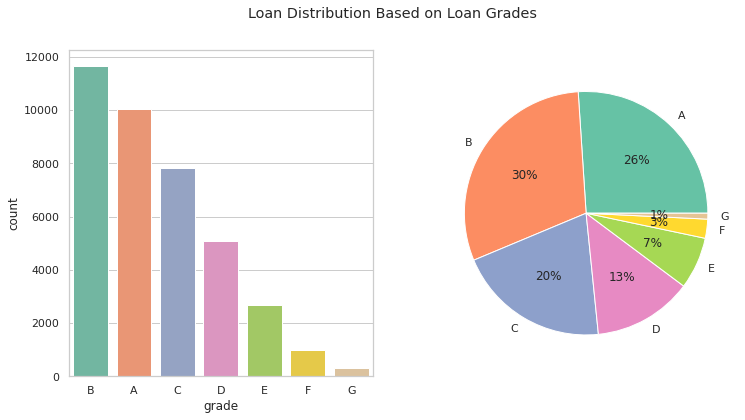

In [26]:
# Loan Distribution among customer profile 
# Loan Grade
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(loan_df['grade'], order=loan_df['grade'].value_counts().index)
plt.subplot(1,2,2)
plt.pie(loan_df.groupby('grade')['grade'].count(),labels=['A','B','C','D','E','F','G'],autopct='%.0f%%')
plt.suptitle('Loan Distribution Based on Loan Grades')
plt.show()

#### Observations
+ Most of Loans have grades B, A, C. 
+ Hence most of these loans are stated as High Graded Loans

Borrower's Employement Length (Assumption - Experience in Years)

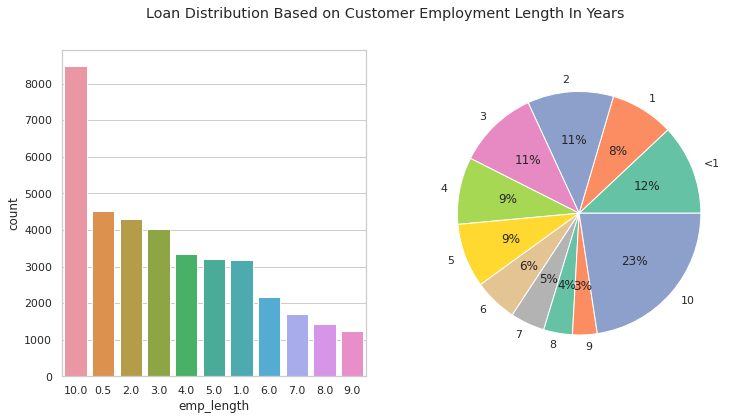

In [27]:
# Employment Length
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(loan_df['emp_length'], order=loan_df['emp_length'].value_counts().index)
plt.subplot(1,2,2)
plt.pie(loan_df.groupby('emp_length')['emp_length'].count(),labels=['<1','1','2','3','4','5','6','7','8','9','10'],autopct='%.0f%%')
plt.suptitle('Loan Distribution Based on Customer Employment Length In Years')
plt.show()

#### Observations
+ Most of Borrowers have 10+ years experience
+ Interestingly there is big chunck of Borrowers with 3 or lesser years of experience  

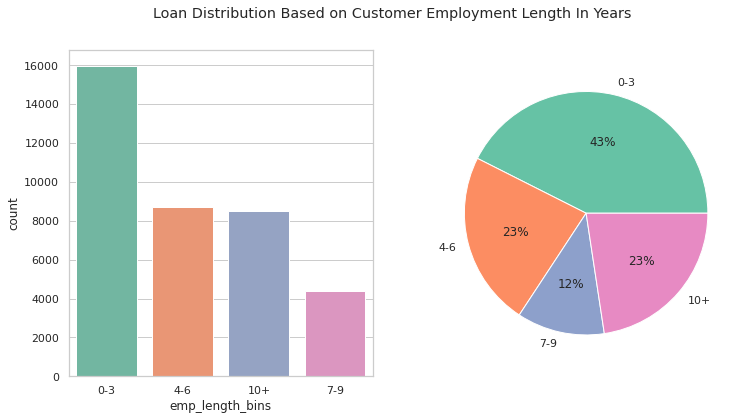

In [28]:
loan_df['emp_length_bins'] = pd.cut(loan_df['emp_length'],bins=[0,3,6,9,10], labels=["0-3","4-6","7-9","10+"])
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(loan_df['emp_length_bins'], order=loan_df['emp_length_bins'].value_counts().index)
plt.subplot(1,2,2)
plt.pie(loan_df.groupby('emp_length_bins').size(), labels=["0-3","4-6","7-9","10+"],autopct='%.0f%%')
plt.suptitle('Loan Distribution Based on Customer Employment Length In Years')
plt.show()

Borrower's Annual Income

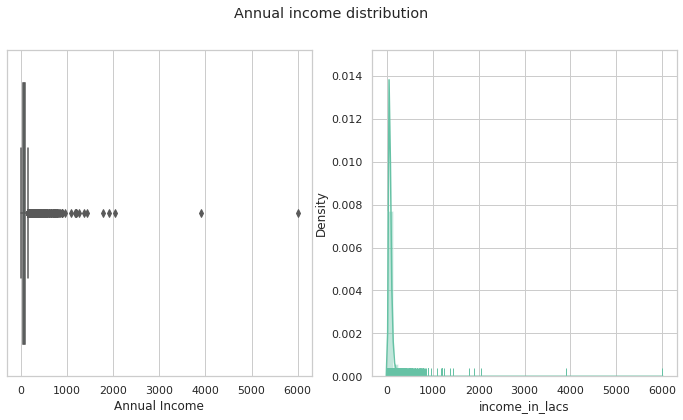

In [29]:
# Understanding correlation with Income 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x=loan_df['income_in_lacs'])
plt.xlabel('Annual Income')
plt.subplot(1,2,2)
sns.distplot(a=loan_df['income_in_lacs'], rug=True)
plt.suptitle('Annual income distribution')
plt.show()

#### Observations
+ Since we haven't treated outliers for Annual Inc attribute we can observe data variation
+ There are two browers with above 30 lakhs income

Borrower's Home Ownership Status

In [30]:
loan_df.groupby('home_ownership')['home_ownership'].count()

home_ownership
MORTGAGE    17021
NONE            3
OTHER          98
OWN          2975
RENT        18480
Name: home_ownership, dtype: int64

 As there are only 3 records with 'NONE' value, will replace it with 'OTHER'

In [31]:
#replacing 'NONE' with 'OTHERS'
loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

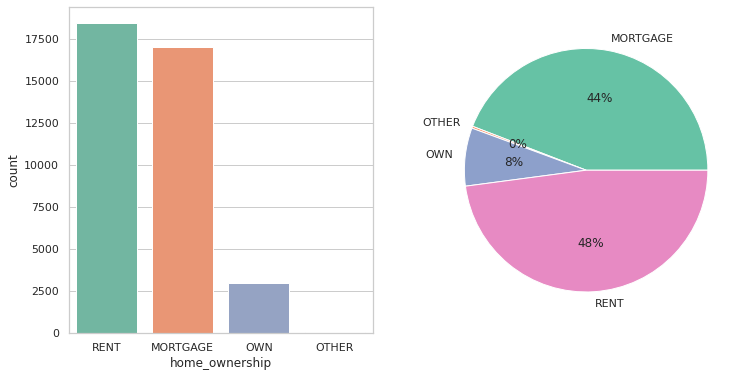

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='home_ownership',data=loan_df, order=loan_df['home_ownership'].value_counts().index)
plt.subplot(1,2,2)
plt.pie(x=loan_df.groupby('home_ownership')['home_ownership'].count(),labels=['MORTGAGE','OTHER','OWN','RENT'],autopct='%.0f%%')
plt.show()

Borrower's Loan's Purpose

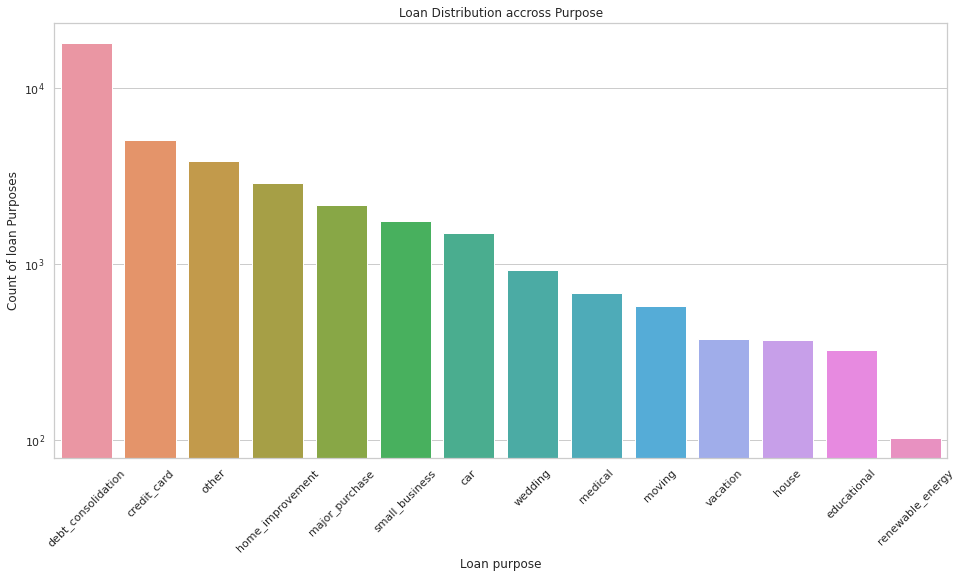

In [33]:
plt.figure(figsize=(16,8))
pf = sns.countplot(x='purpose',data=loan_df,order=loan_df['purpose'].value_counts().index)
pf.set(xlabel='Loan purpose', ylabel='Count of loan Purposes',title='Loan Distribution accross Purpose')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

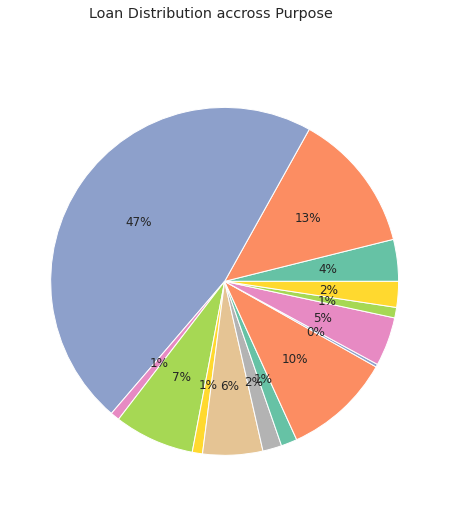

In [34]:
plt.figure(figsize=(15,8))
plt.pie(x=loan_df.groupby('purpose')['purpose'].count(),autopct='%.0f%%')
plt.suptitle('Loan Distribution accross Purpose')
plt.show()

Interest Rate

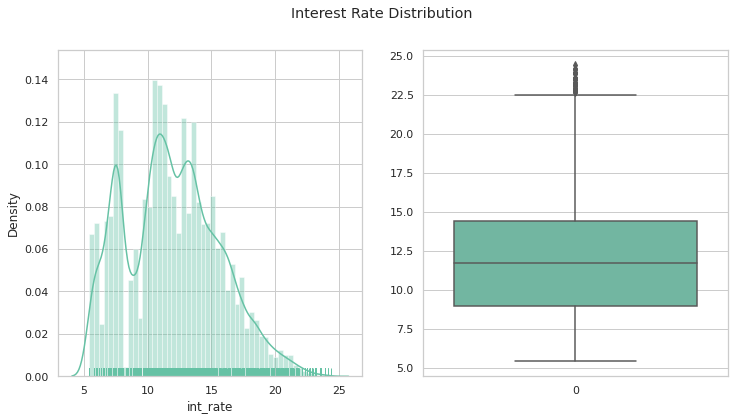

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(a=loan_df.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df.int_rate)
plt.suptitle('Interest Rate Distribution')
plt.show()

#### Observations
+ Most of the interest rates lies between 9% to 14.5%.
+ Some borrowers took loan at higher rates of interest 22.5% and above


Installments

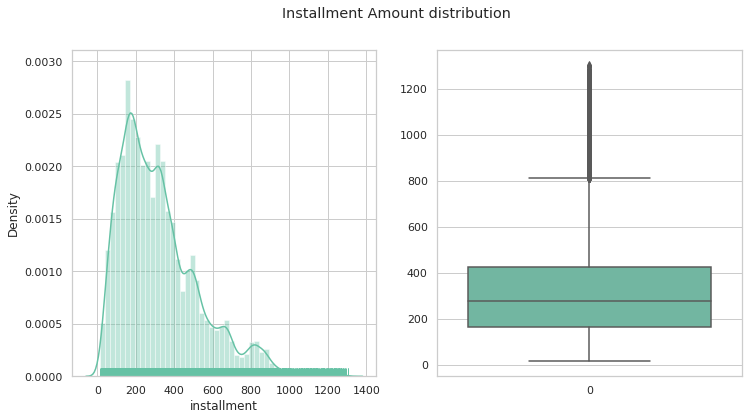

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(a=loan_df.installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df.installment)
plt.suptitle('Installment Amount distribution')
plt.show()

#### Observations
+  Most of Installment amount in around 280.

##### DTI
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

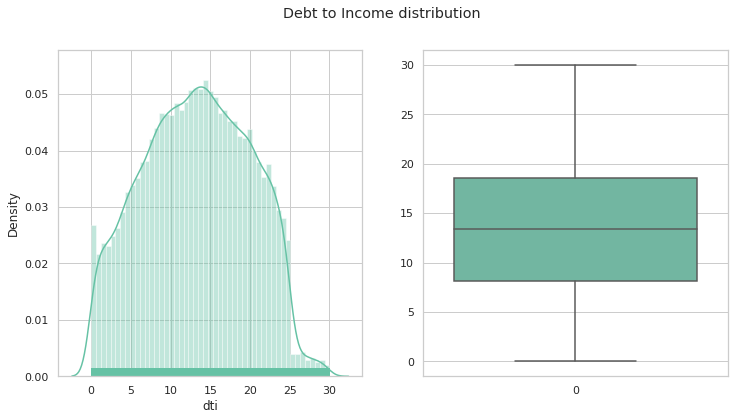

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(a=loan_df.dti, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df.dti)
plt.suptitle('Debt to Income distribution')
plt.show()

Most of the loans are given to Borrowers who have Debt to Income ratio less than 30.

Term

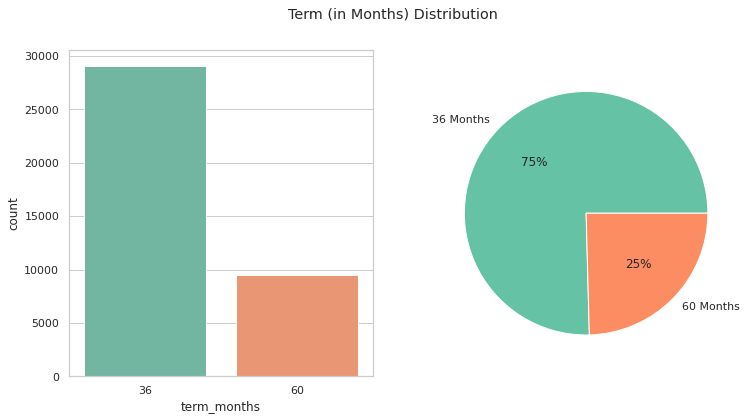

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='term_months',data=loan_df, order=loan_df['term_months'].value_counts().index)
plt.subplot(1,2,2)
plt.pie(x=loan_df.groupby('term_months')['term_months'].count(),labels=['36 Months','60 Months'],autopct='%.0f%%')
plt.suptitle('Term (in Months) Distribution')
plt.show()

#### Observations:
Most of Borrowers have taken 36 months tenure than 60 months.

Verification Status

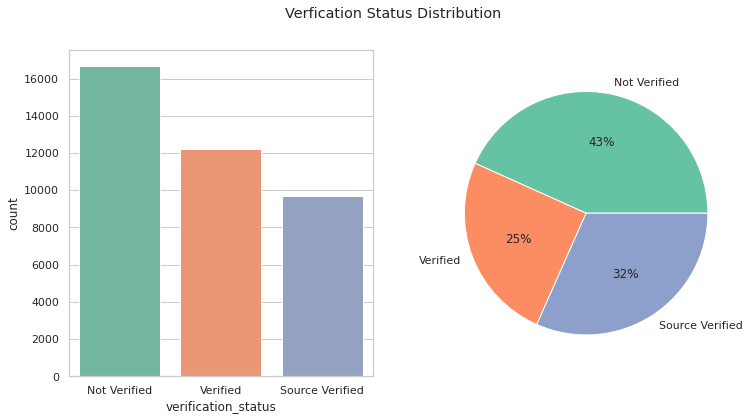

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='verification_status',data=loan_df, order=loan_df['verification_status'].value_counts().index)
plt.subplot(1,2,2)
plt.pie(x=loan_df.groupby('verification_status')['verification_status'].count(),labels=['Not Verified','Verified', 'Source Verified'],autopct='%.0f%%')
plt.suptitle('Verfication Status Distribution')
plt.show()

Loan Issue Date(in Years)

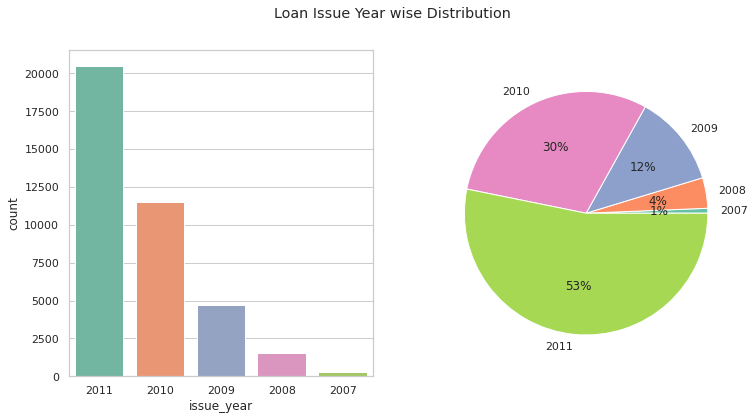

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='issue_year',data=loan_df, order=loan_df['issue_year'].value_counts().index)
plt.subplot(1,2,2)
plt.pie(x=loan_df.groupby('issue_year')['issue_year'].count(),labels=['2007','2008', '2009','2010','2011'],autopct='%.0f%%')
plt.suptitle('Loan Issue Year wise Distribution')
plt.show()

Most of loans were taken during 2011

Borrower's State

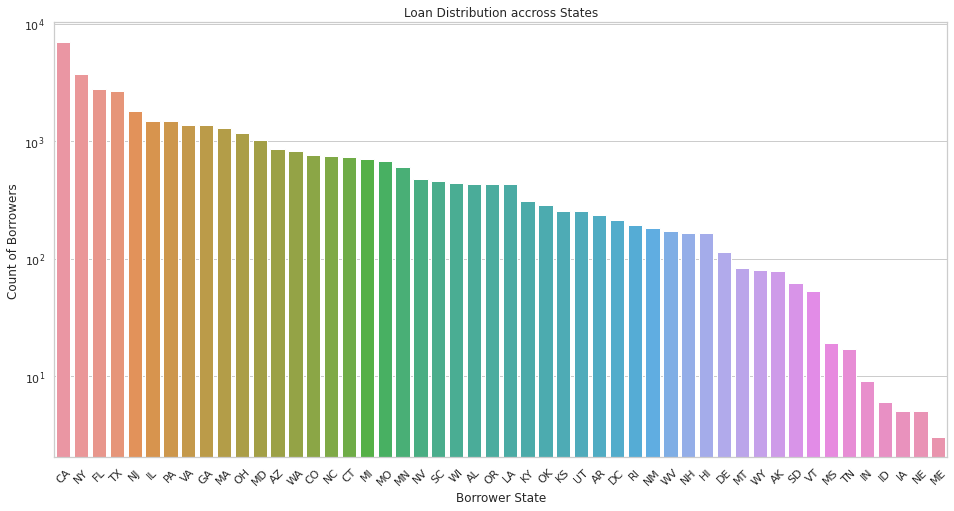

In [41]:
plt.figure(figsize=(16,8))
pf = sns.countplot(x='addr_state',data=loan_df, order=loan_df['addr_state'].value_counts().index)
pf.set(xlabel='Borrower State', ylabel='Count of Borrowers',title='Loan Distribution accross States')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

Most of Borrowers belong to CA, NA, FL, TX states

#### BiVariate Analysis 

Defaulters' Employement Experience 

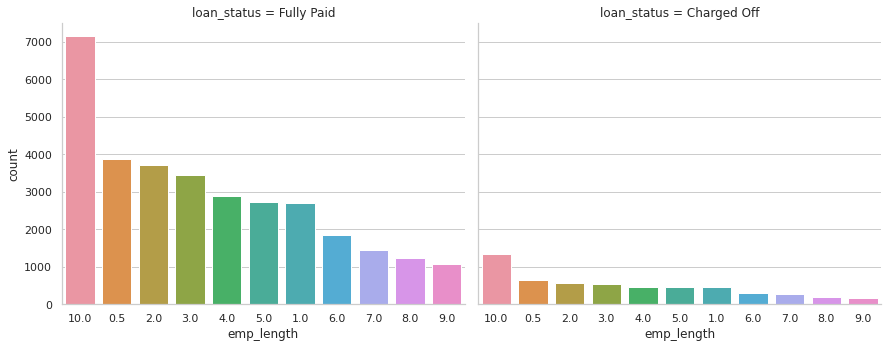

In [42]:
# Analysing Employment Length influence on Loan status
sns.catplot(x='emp_length',col='loan_status',data=loan_df, kind='count', aspect=1.25, order=loan_df.emp_length.value_counts().index)
plt.show()

<Figure size 864x432 with 0 Axes>

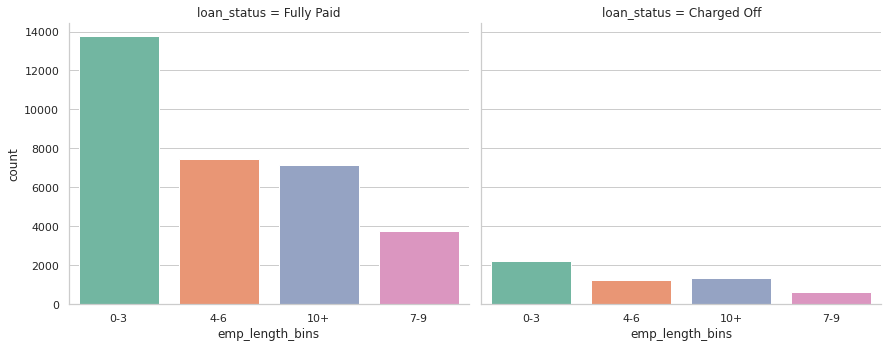

In [43]:
plt.figure(figsize=(12,6))
sns.catplot(x='emp_length_bins',col='loan_status',data=loan_df, kind='count', aspect=1.25, order=loan_df.emp_length_bins.value_counts().index)
plt.show()

<Figure size 864x1440 with 0 Axes>

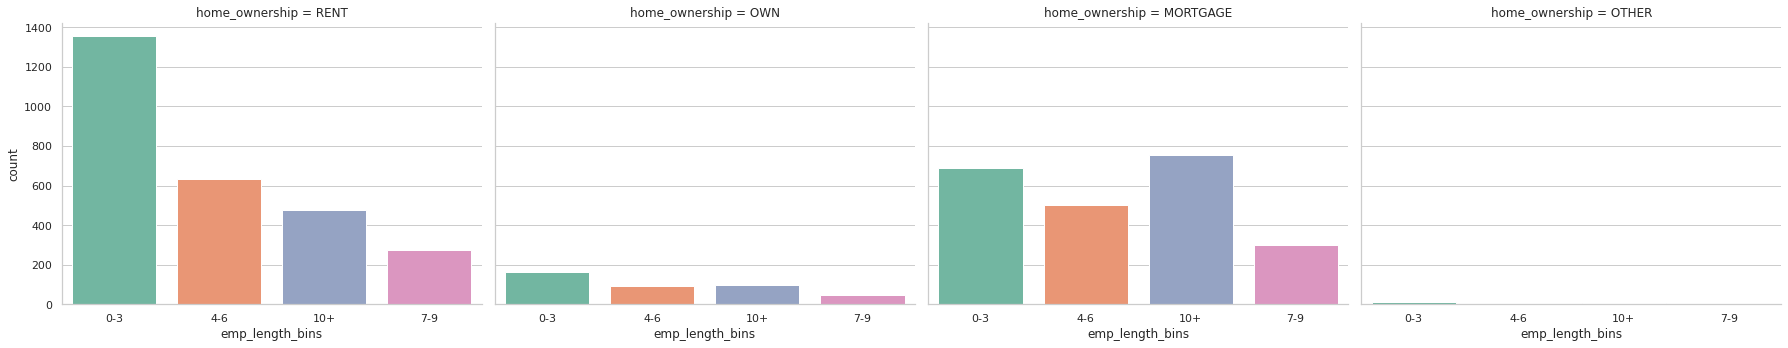

In [62]:
plt.figure(figsize=(12,20))
sns.catplot(x='emp_length_bins', col='home_ownership',data=loan_df[loan_df.loan_status == 'Charged Off'], kind='count', aspect=1.25, order=loan_df.emp_length_bins.value_counts().index)
plt.show()

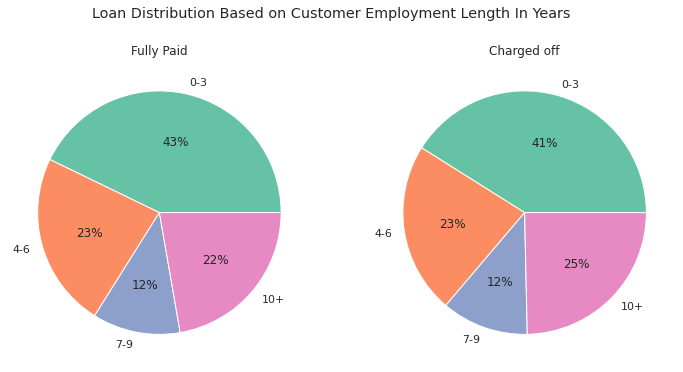

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Fully Paid')
plt.pie(x=loan_df[loan_df['loan_status']=='Fully Paid'].groupby('emp_length_bins').size(), labels=["0-3","4-6","7-9","10+"],autopct='%.0f%%')
plt.subplot(1,2,2)
plt.pie(x=loan_df[loan_df['loan_status']=='Charged Off'].groupby('emp_length_bins').size(), labels=["0-3","4-6","7-9","10+"],autopct='%.0f%%')
plt.title('Charged off')
plt.suptitle('Loan Distribution Based on Customer Employment Length In Years')
plt.show()

Defaulters' Verfication Status 

<Figure size 864x432 with 0 Axes>

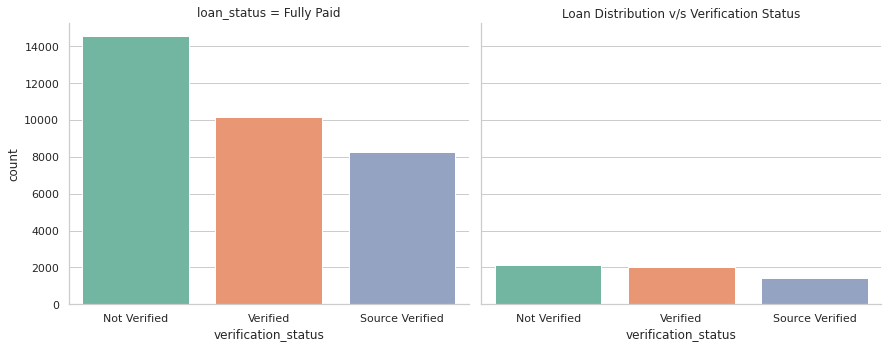

In [101]:
plt.figure(figsize=(12,6))
sns.catplot(x='verification_status',col='loan_status',data=loan_df, kind='count', aspect=1.25, 
order=loan_df.verification_status.value_counts().index)
plt.show()

Defaulters' Loan Grades 

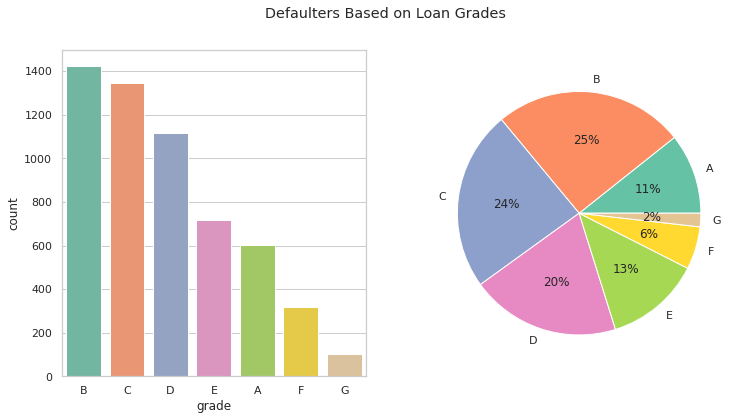

In [45]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(loan_df[loan_df['loan_status']=='Charged Off']['grade'],order=loan_df[loan_df['loan_status']=='Charged Off']['grade'].value_counts().index)
plt.subplot(1,2,2)
plt.pie(loan_df.loc[loan_df['loan_status']=='Charged Off'].groupby('grade')['grade'].count(),labels=['A','B','C','D','E','F','G'],autopct='%.0f%%')
plt.suptitle('Defaulters Based on Loan Grades')
plt.show()

Defaulters' Loan Term 

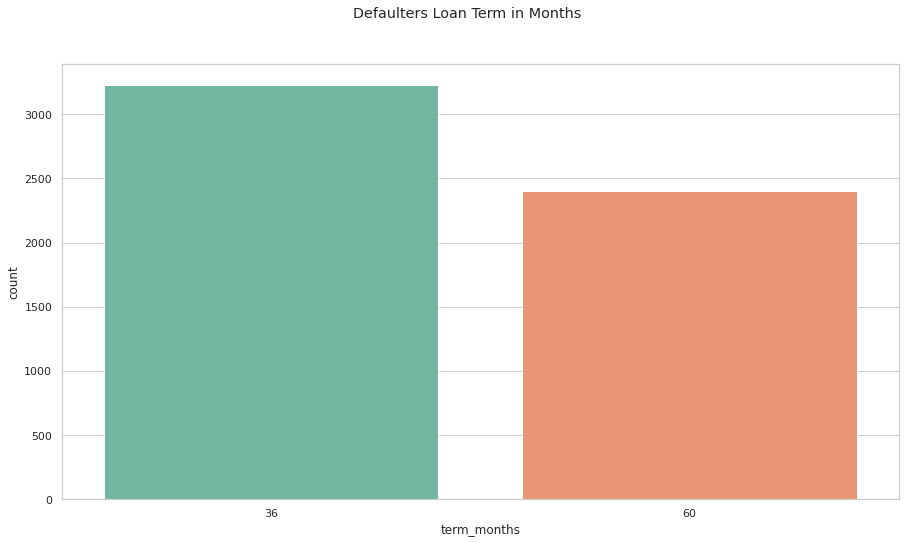

In [95]:
plt.figure(figsize=(15,8))
sns.countplot( x="term_months", data=loan_df[loan_df.loan_status == 'Charged Off'], order=loan_df.term_months.value_counts().index)
plt.suptitle('Defaulters Loan Term in Months')
plt.show()

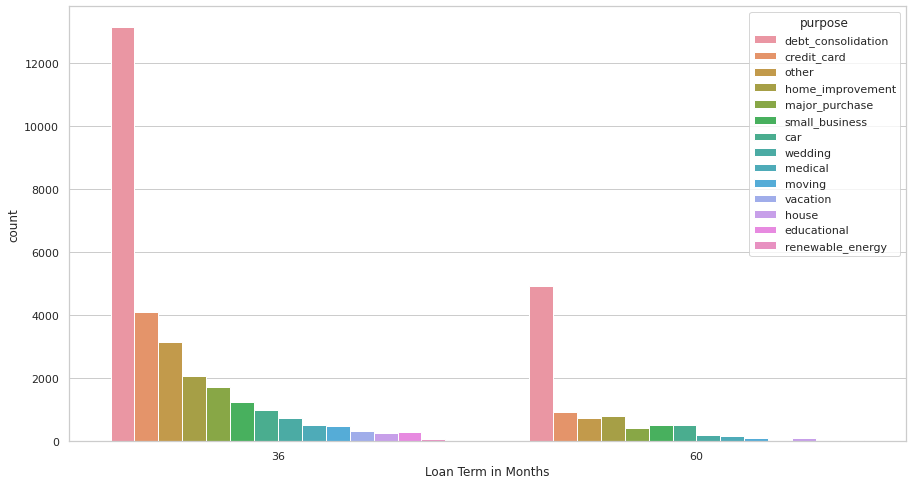

In [46]:
plt.figure(figsize=(15,8))
sns.countplot( x="term_months", hue='purpose', data=loan_df, hue_order=loan_df.purpose.value_counts().index)
plt.xlabel('Loan Term in Months')
plt.show()

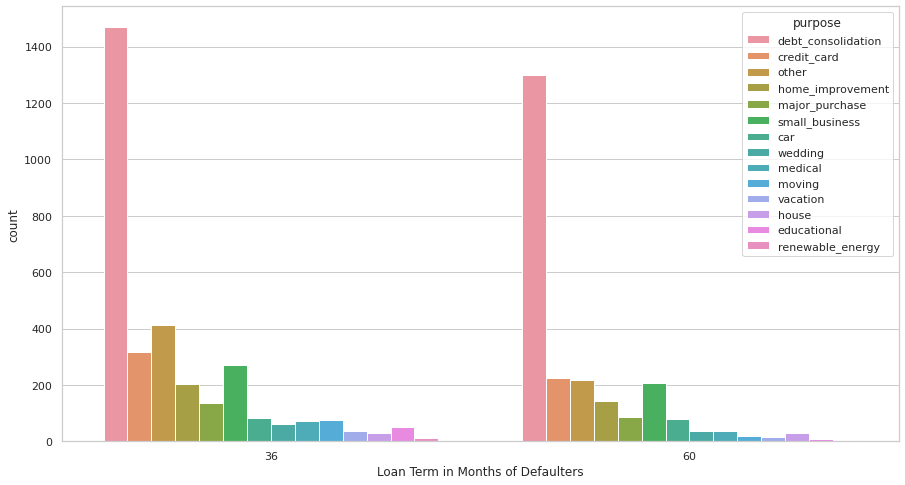

In [47]:
plt.figure(figsize=(15,8))
sns.countplot( x="term_months", hue='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'], hue_order=loan_df.purpose.value_counts().index)
plt.xlabel('Loan Term in Months of Defaulters')
plt.show()

Borrowers with tenure of 36 months have high probability to be defaulters

Defaulters' influence with Interest Rate  

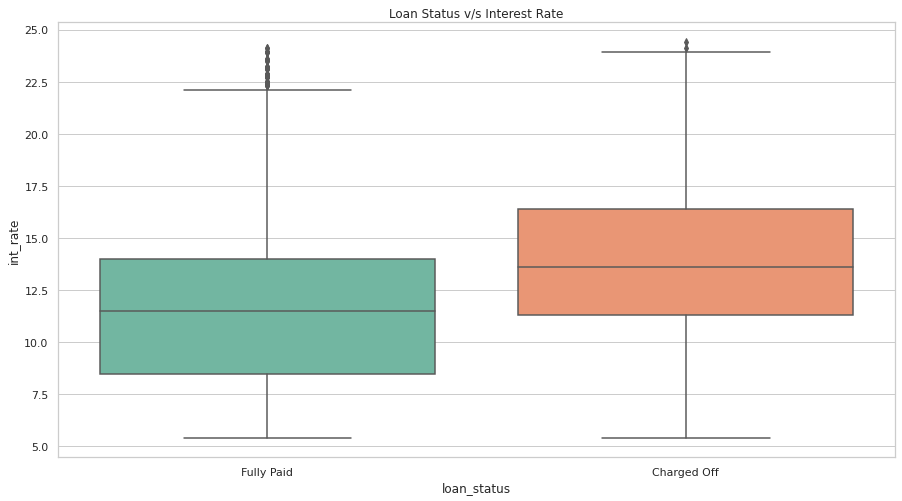

In [48]:
plt.figure(figsize=(15,8))
sns.boxplot(x='loan_status', y='int_rate', data=loan_df)
plt.title('Loan Status v/s Interest Rate')
plt.show()

Higher Interest has high probability of default

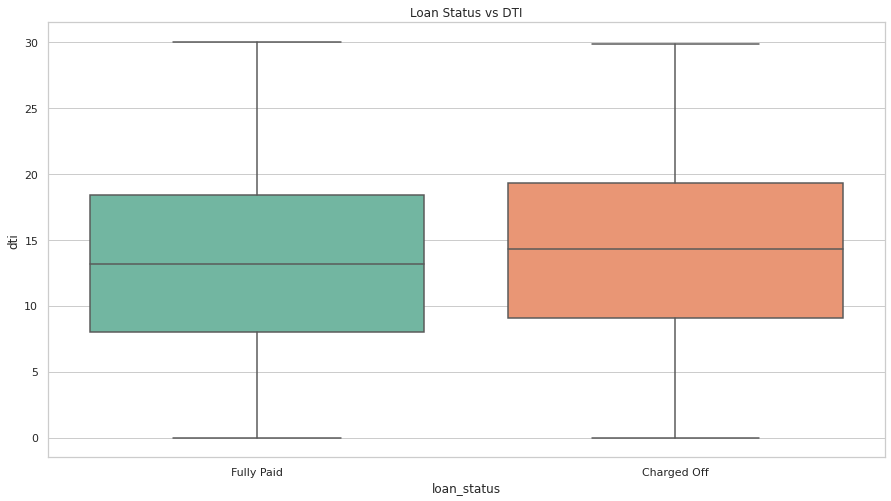

In [49]:
plt.figure(figsize=(15,8))
sns.boxplot(x='loan_status', y=loan_df.dti, data=loan_df)
plt.title('Loan Status vs DTI')
plt.show()

High Probability of Default for Borrowers with high DTI

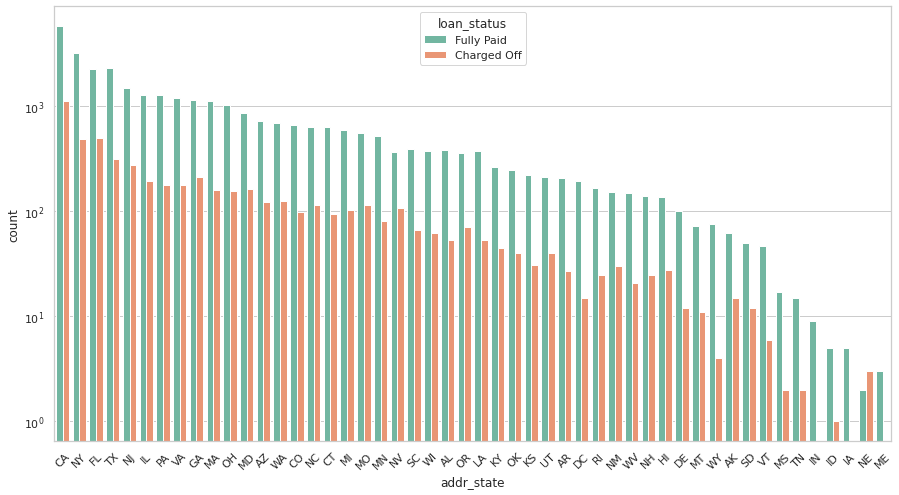

In [53]:
plt.figure(figsize=(15,8))
sns.countplot(x='addr_state',hue='loan_status', data=loan_df, order=loan_df.addr_state.value_counts().index)
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

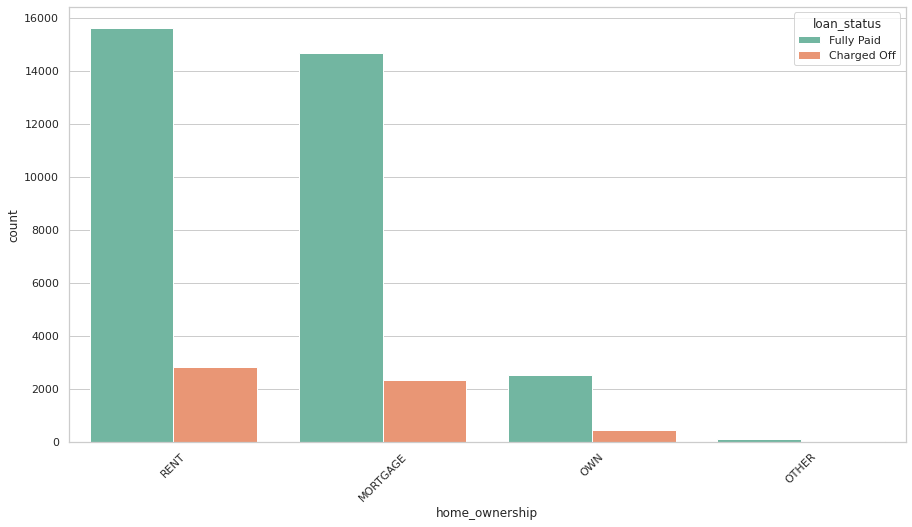

In [50]:
plt.figure(figsize=(15,8))
sns.countplot(x='home_ownership',hue='loan_status', data=loan_df, order=loan_df.home_ownership.value_counts().index)
plt.xticks(rotation=45)
plt.show()

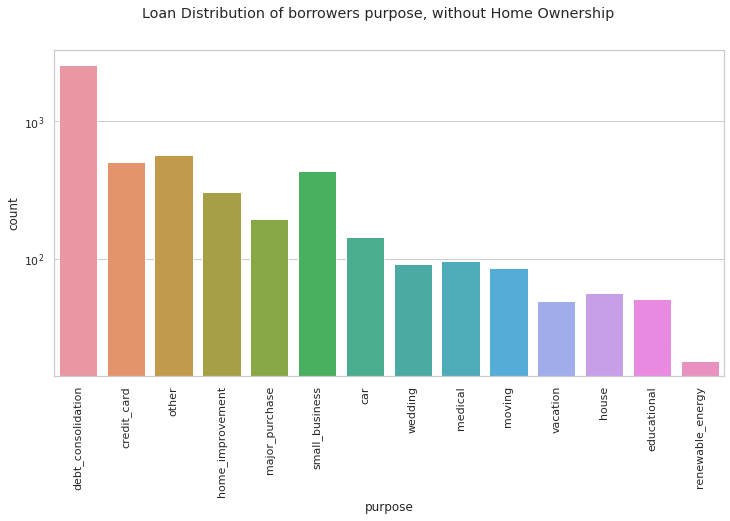

In [88]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose', data=loan_df[(loan_df.loan_status == 'Charged Off') & (loan_df.home_ownership.isin(['RENT','MORTGAGE']))], 
order=loan_df.purpose.value_counts().index)
plt.xticks(rotation=90)
plt.yscale('log')
plt.suptitle('Loan Distribution of borrowers purpose, without Home Ownership')
plt.show()

Borrowers with no home ownership and having purpose of debt_cobsolidation have high probability of default

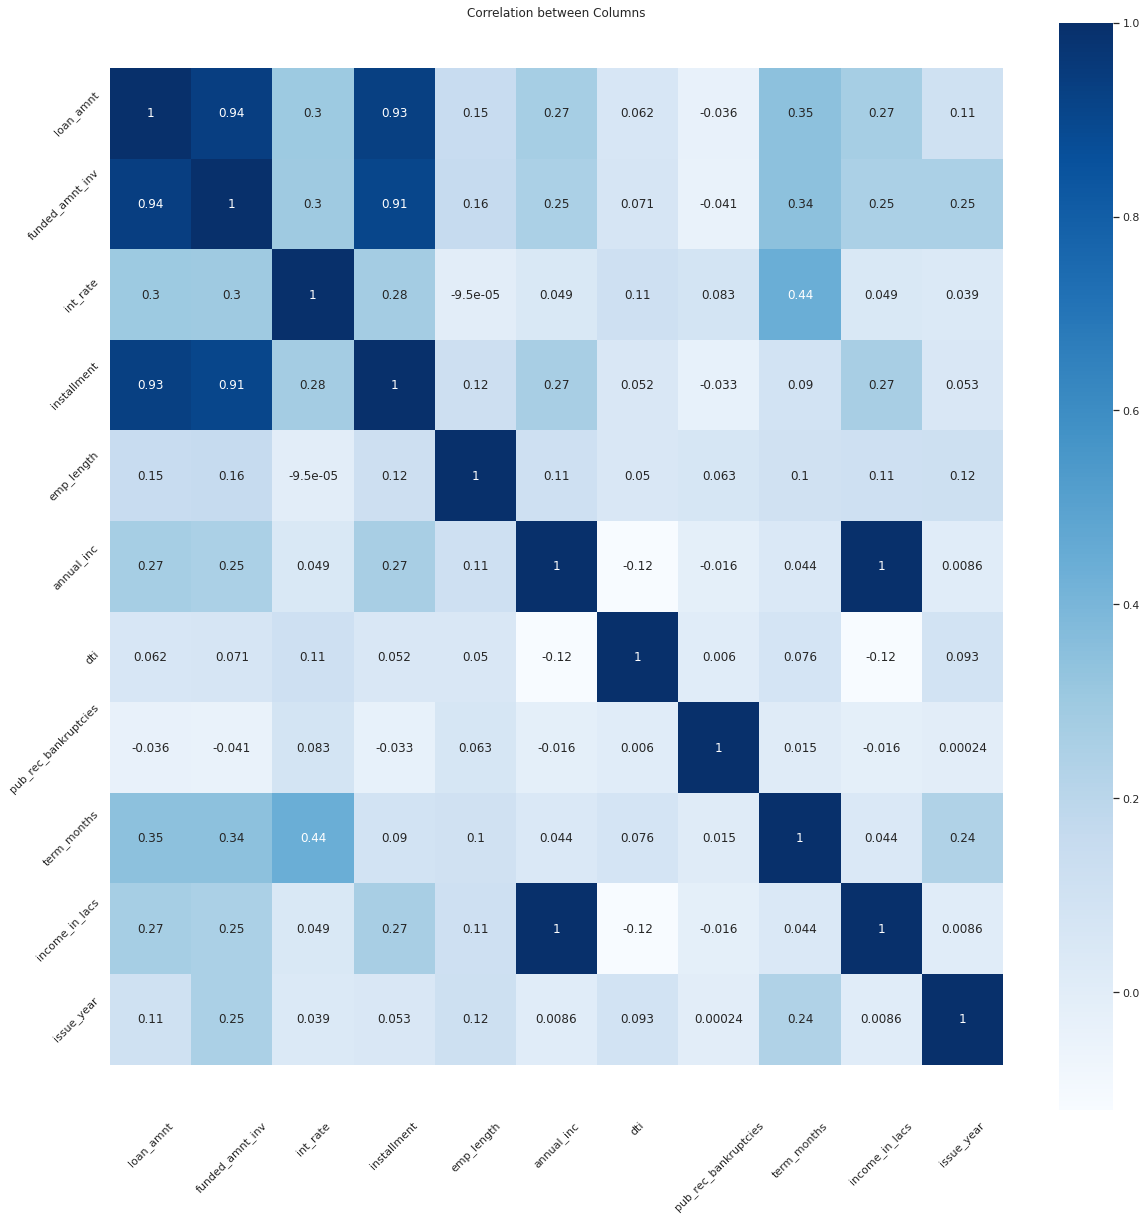

In [51]:
plt.figure(figsize=(20,20))
pf = sns.heatmap(loan_df.corr(), annot = True, cmap='Blues')
top, bottom = pf.get_ylim()
pf.set_ylim(top+0.5, bottom-0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.title("Correlation between Columns")
plt.show()